# Problem statement. Describe the dataset, analyze the target variable, and state your prediction goal

In [2]:
#Description - 
#Name: Title of the video game
#Platform: Gaming platform (e.g., PC, PS4, Xbox).
#Year: Release year of the game
#Genre: Genre of the game (e.g., Action, Adventure, Sports)
#Publisher: The company that published the game
#NA_Sales: Sales in North America (in millions)
#EU_Sales: Sales in Europe (in millions)
#JP_Sales: Sales in Japan (in millions)
#Other_Sales: Sales in other regions (in millions)
#Global_Sales: Total sales worldwide (in millions)

#Target Variable - 
#Globale_Sales

#Prediction Goal - 
#The goal is to predict Global_Sales of video games based on features such as 
#platform, genre, year of release, and publisher

# Setup

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('Downloads/vgsales.csv')
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Basic data cleaning

In [6]:
#Drop Unwanted Features
dfcleaned = df.drop(columns=['Name', 'Publisher'])

#Address Missing Values
missing_values = dfcleaned.isnull().sum()
print(missing_values)

#Remvove Duplicates
dfcleaned = dfcleaned.drop_duplicates()

Rank              0
Platform          0
Year            271
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [7]:
#Check for Inconsistent Inputs in Categorical Variables
print(dfcleaned['Platform'].unique())
print(dfcleaned['Genre'].unique())

#Transform Categorical Variables into Numeric
dfcleaned = pd.get_dummies(dfcleaned, columns=['Platform', 'Genre'], drop_first=True)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


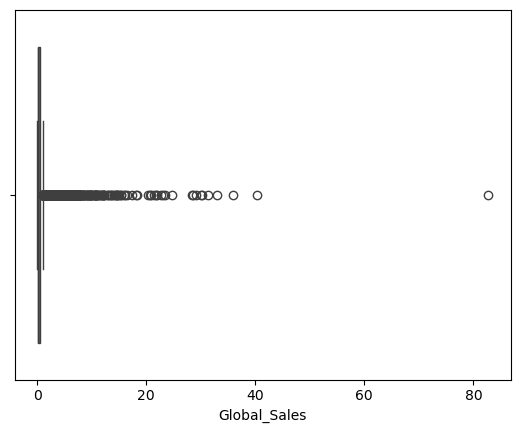

In [8]:
#Identify Outliers with Boxplots or Histograms
sns.boxplot(x=dfcleaned['Global_Sales'])
plt.show()

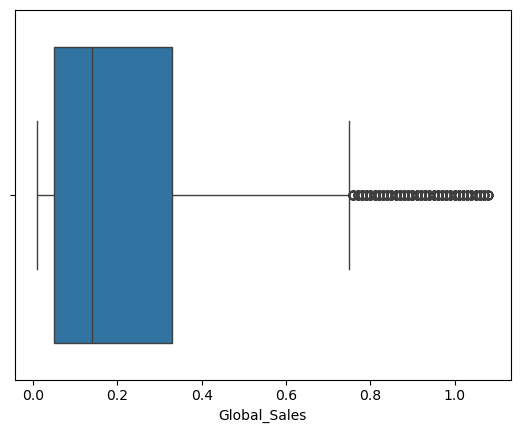

In [9]:
Q1 = dfcleaned['Global_Sales'].quantile(0.25)
Q3 = dfcleaned['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

#Removing outliers
dfcleaned = dfcleaned[(dfcleaned['Global_Sales'] >= (Q1 - 1.5 * IQR)) & (dfcleaned['Global_Sales'] <= (Q3 + 1.5 * IQR))]
sns.boxplot(x=dfcleaned['Global_Sales'])
plt.show()

In [10]:
#For Categorial Tests
print(dfcleaned.columns)
platformdummies = ['Platform_3DO', 'Platform_3DS', 'Platform_DC',
       'Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_GC',
       'Platform_GEN', 'Platform_GG', 'Platform_N64', 'Platform_NES',
       'Platform_NG', 'Platform_PC', 'Platform_PCFX', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES',
       'Platform_TG16', 'Platform_WS', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XB', 'Platform_XOne']
genredummies = ['Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Platform_3DO', 'Platform_3DS', 'Platform_DC',
       'Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_GC',
       'Platform_GEN', 'Platform_GG', 'Platform_N64', 'Platform_NES',
       'Platform_NG', 'Platform_PC', 'Platform_PCFX', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES',
       'Platform_TG16', 'Platform_WS', 'Platform_Wii', 'Platform_WiiU',
       'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'],
      dtype='object')


# Feature selection

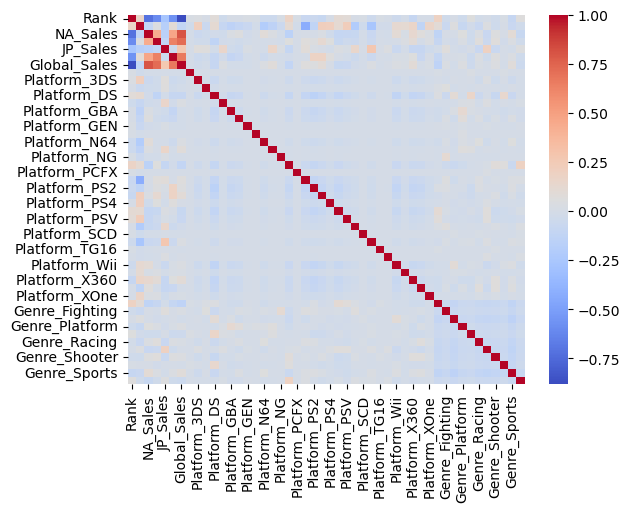

In [12]:
#Identify Irrelevant Features
corr = dfcleaned.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [13]:
#ANOVA Test and Chi2 test are not needed because the only 2 categorial columns 
#were made into dummiew earlier how every this is how

from scipy import stats

f, p = stats.f_oneway(*(df[df['Genre'] == genre]['Global_Sales'] for genre in df['Genre'].unique()))
print('F-value:', f, 'P-value:', p)

f, p = stats.f_oneway(*(df[df['Genre'] == genre]['Global_Sales'] for genre in df['Genre'].unique()))
print('F-value:', f, 'P-value:', p)

F-value: 18.218183813632837 P-value: 1.0627988216038264e-36
F-value: 18.218183813632837 P-value: 1.0627988216038264e-36


In [14]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

bins = [0, 1, 10, 50, 100, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']
dfassist = dfcleaned
dfassist['Sales_Category'] = pd.cut(dfassist['Global_Sales'], bins=bins, labels=labels)
y = dfassist['Global_Sales']
X = dfassist[platformdummies]
chi, p = chi2(X, dfassist['Sales_Category'])
print(platformdummies)
print('Chi-squared Stat:', chi, "\n", 'P-value:', p, "\n")

X = dfassist[genredummies]
chi, p = chi2(X, dfassist['Sales_Category'])
print(genredummies)
print('Chi-squared Stat:', chi, "\n", 'P-value:', p)

['Platform_3DO', 'Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GB', 'Platform_GBA', 'Platform_GC', 'Platform_GEN', 'Platform_GG', 'Platform_N64', 'Platform_NES', 'Platform_NG', 'Platform_PC', 'Platform_PCFX', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_SAT', 'Platform_SCD', 'Platform_SNES', 'Platform_TG16', 'Platform_WS', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne']
Chi-squared Stat: [3.32095710e-02 3.30265650e+00 5.09213421e-01 1.80070746e+00
 5.28147708e-01 2.23467575e+00 1.23253106e+00 1.77117712e-01
 1.10698570e-02 1.63804715e-04 2.29138571e+01 1.32838284e-01
 2.38452481e+00 1.10698570e-02 7.18580951e+00 2.72754908e-01
 5.19883051e+00 1.47043295e+00 3.59132783e+00 4.49436194e+00
 4.10843688e-01 5.53492849e-02 3.65247867e-01 2.21397140e-02
 6.64191419e-02 1.98897503e+00 1.88369098e+00 1.14412417e+01
 2.39708815e+00 4.10843688e-01] 
 P-value: [8.55398359e-01 6.91679392e-02 4.75

In [15]:
#Zero to Little Varience
dfcleaned = dfcleaned.drop(columns='Sales_Category')
variance = dfcleaned.var()
low_variance_features = variance[variance < 0.01]
print(low_variance_features.index)

Index(['EU_Sales', 'Other_Sales', 'Platform_3DO', 'Platform_DC', 'Platform_GB',
       'Platform_GEN', 'Platform_GG', 'Platform_NES', 'Platform_NG',
       'Platform_PCFX', 'Platform_SCD', 'Platform_TG16', 'Platform_WS',
       'Platform_WiiU'],
      dtype='object')


In [16]:
#High-Correlated Features
corr_matrix = dfcleaned.corr()
high_corr_features = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_features[(high_corr_features > 0.8) & (high_corr_features < 1)]
print(high_corr_pairs)

NA_Sales      Global_Sales    0.804268
Global_Sales  NA_Sales        0.804268
dtype: float64


In [17]:
#Any variables with zero to little variance? - 
    #'EU_Sales', 'Other_Sales', 'Platform_3DO', 'Platform_DC', 'Platform_GB',
    #'Platform_GEN', 'Platform_GG', 'Platform_NES', 'Platform_NG',
    #'Platform_PCFX', 'Platform_SCD', 'Platform_TG16', 'Platform_WS',
    #'Platform_WiiU'

#Any features Irrelevant to the target variable? - 
    #Platform_3DO (0.855), Platform_3DS (0.069), Platform_DC (0.475), etc.

#Any high-correlated Features? - 
    #NA_Sales      Global_Sales    0.804268

#Are there any categorical variables need to be changed to dummy variables?
    #Yes, Genre and Platform were changed earlier

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfscaled = scaler.fit_transform(dfcleaned)
dfscaled

array([[-1.73187496, -0.65104897,  2.70979564, ..., -0.2373137 ,
        -0.405215  , -0.21522391],
       [-1.7316394 ,  0.24499577,  2.31737008, ..., -0.2373137 ,
        -0.405215  , -0.21522391],
       [-1.73140384, -0.83025792,  2.70979564, ..., -0.2373137 ,
        -0.405215  , -0.21522391],
       ...,
       [ 1.73156251,  0.24499577, -0.75663009, ..., -0.2373137 ,
        -0.405215  , -0.21522391],
       [ 1.73179807,  0.60341366, -0.75663009, ..., -0.2373137 ,
        -0.405215  , -0.21522391],
       [ 1.73203363, -0.65104897, -0.69122584, ..., -0.2373137 ,
        -0.405215  , -0.21522391]])

# Build the prediction model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = dfcleaned.drop('Global_Sales', axis=1)
y = dfcleaned['Global_Sales']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(Xtrain, ytrain)
pred = model.predict(Xtest)

mse = mean_squared_error(ytest, pred)
r2 = r2_score(ytest, pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 4.5270656239376365e-07
R-squared Score: 0.9999926198975572


In [21]:
#Does this data need to be balanced?
    #Balancing is not necessary since the target variable is continuous

#Do you use train_test_split or cross validation to validate the result?
    #Cross-validation 

#Which algorithm is appropriate for this problem?
    #Simple linear regression model

#Which metrics do you use to evaluate the prediction model?
    #Mean Squared Error: 4.5270656239376365e-07
    #R-squared Score: 0.9999926198975572
